# IDP MD Simulation Analysis Protocol:
------
Developed for analysis of wildtype simulation 

## Notes:
#### Preprocessing
- Must specify protein length and window sizes
- Data is normalized to 0-1
---
#### Feature Enrichment
- No enrichment or filtering
---
#### Autoencoder Tuning
- No Tuning - Predetermined structure
---
#### Autoencoder Training
- Default Structure, Default Data
- 4, 5, 7, 8 Layer Models
- Local Compaction & Local Angle Data
- Unshuffled Data
---
#### Clustering
- Agglomerative Co-Clustering

In [ ]:
import os
import re
import sys
import glob
import time
import json
import subprocess
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from scipy.stats import mode
from kneed import KneeLocator
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from IPython.display import Image, display

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Activation, Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import Callback

# Visualize Loss/Val_Loss Graphs

# Default AE, Default Data

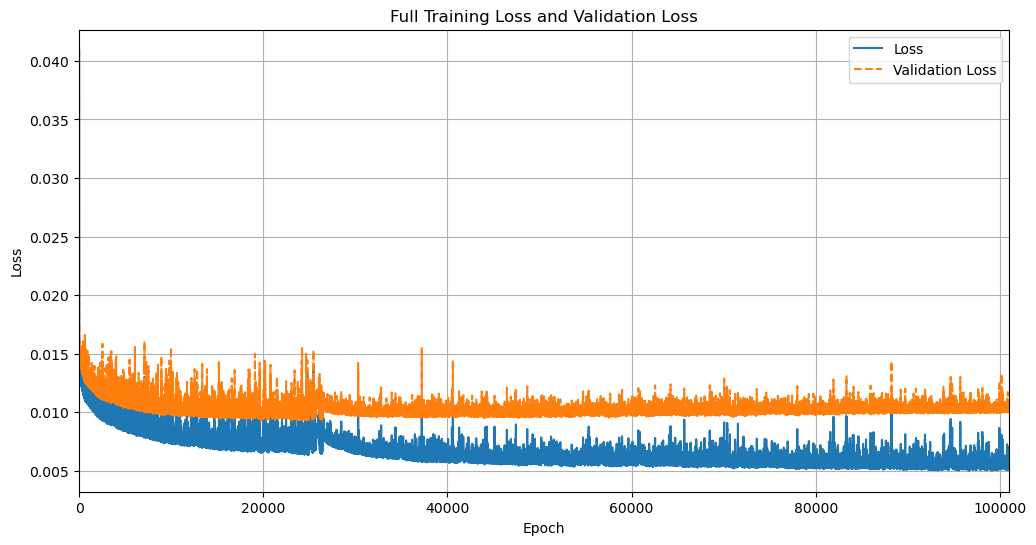

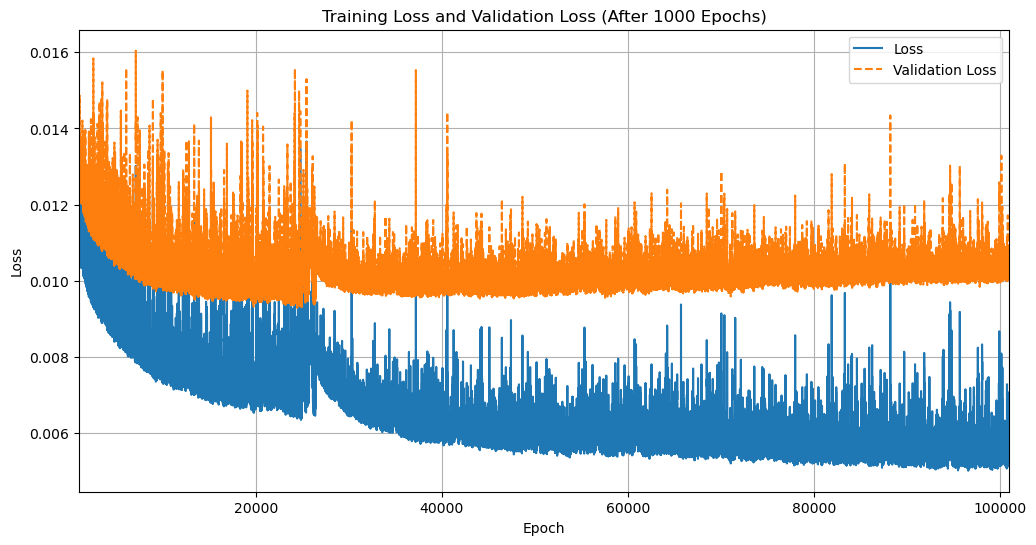

Minimum Loss: 0.005009 at Epoch 96606
Minimum Validation Loss: 0.009288 at Epoch 24451


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the folder where training loss data is stored
loss_data_folder = 'Default_AE_Default_Data/AE_Training_1/AE_Training_Loss_Data'

# Initialize lists to store combined data
all_loss = []
all_val_loss = []

# Load all training loss data and concatenate into single lists
for counts in range(101):
    history_file_path = os.path.join(loss_data_folder, f"{counts}_Autoencoder_Training_History.pkl")
    if os.path.exists(history_file_path):
        history = pd.read_pickle(history_file_path)
        all_loss.extend(history['loss'].tolist())
        all_val_loss.extend(history['val_loss'].tolist())
    else:
        print(f"Warning: Missing file for count {counts}")

# Ensure epoch indices are properly aligned with 101,000 epochs
epochs = list(range(len(all_loss)))

# Plot 1: Full training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, all_loss, label='Loss')
plt.plot(epochs, all_val_loss, label='Validation Loss', linestyle='--')
plt.title('Full Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 101000)
plt.legend()
plt.grid()
plt.show()

# Plot 2: Training loss and validation loss omitting first 1000 epochs
plt.figure(figsize=(12, 6))
plt.plot(epochs[1000:], all_loss[1000:], label='Loss')
plt.plot(epochs[1000:], all_val_loss[1000:], label='Validation Loss', linestyle='--')
plt.title('Training Loss and Validation Loss (After 1000 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(1000, 101000)
plt.legend()
plt.grid()
plt.show()

# Find and print minimum loss and validation loss with corresponding epochs
min_loss = min(all_loss)
min_loss_epoch = all_loss.index(min_loss)

min_val_loss = min(all_val_loss)
min_val_loss_epoch = all_val_loss.index(min_val_loss)

print(f"Minimum Loss: {min_loss:.6f} at Epoch {min_loss_epoch}")
print(f"Minimum Validation Loss: {min_val_loss:.6f} at Epoch {min_val_loss_epoch}")


# UnShuffled Data

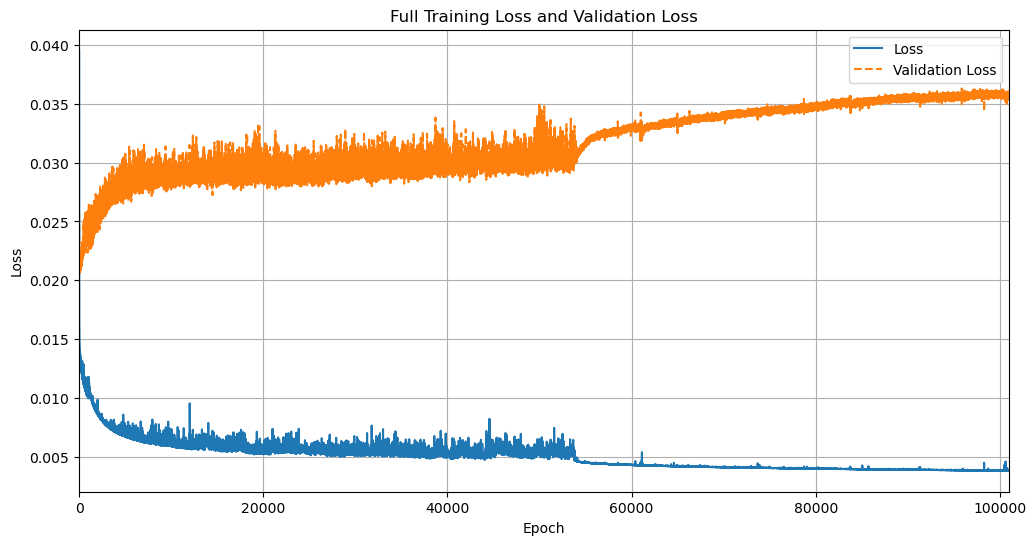

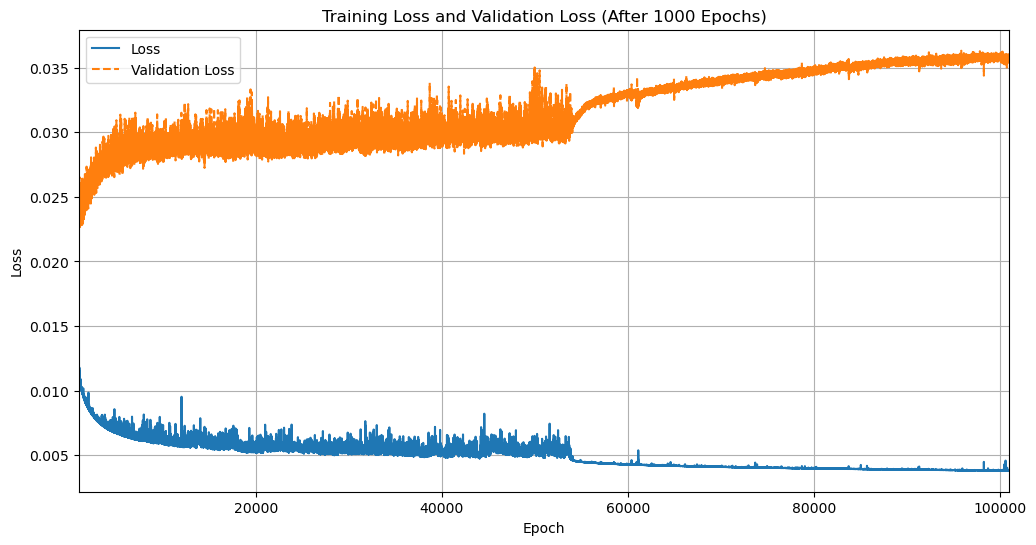

Minimum Loss: 0.003805 at Epoch 100867
Minimum Validation Loss: 0.020592 at Epoch 28


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the folder where training loss data is stored
loss_data_folder = 'Default_AE_UnShuffled_Data/AE_Training_1/AE_Training_Loss_Data'

# Initialize lists to store combined data
all_loss = []
all_val_loss = []

# Load all training loss data and concatenate into single lists
for counts in range(101):
    history_file_path = os.path.join(loss_data_folder, f"{counts}_Autoencoder_Training_History.pkl")
    if os.path.exists(history_file_path):
        history = pd.read_pickle(history_file_path)
        all_loss.extend(history['loss'].tolist())
        all_val_loss.extend(history['val_loss'].tolist())
    else:
        print(f"Warning: Missing file for count {counts}")

# Ensure epoch indices are properly aligned with 101,000 epochs
epochs = list(range(len(all_loss)))

# Plot 1: Full training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, all_loss, label='Loss')
plt.plot(epochs, all_val_loss, label='Validation Loss', linestyle='--')
plt.title('Full Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 101000)
plt.legend()
plt.grid()
plt.show()

# Plot 2: Training loss and validation loss omitting first 1000 epochs
plt.figure(figsize=(12, 6))
plt.plot(epochs[1000:], all_loss[1000:], label='Loss')
plt.plot(epochs[1000:], all_val_loss[1000:], label='Validation Loss', linestyle='--')
plt.title('Training Loss and Validation Loss (After 1000 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(1000, 101000)
plt.legend()
plt.grid()
plt.show()

# Find and print minimum loss and validation loss with corresponding epochs
min_loss = min(all_loss)
min_loss_epoch = all_loss.index(min_loss)

min_val_loss = min(all_val_loss)
min_val_loss_epoch = all_val_loss.index(min_val_loss)

print(f"Minimum Loss: {min_loss:.6f} at Epoch {min_loss_epoch}")
print(f"Minimum Validation Loss: {min_val_loss:.6f} at Epoch {min_val_loss_epoch}")

# Reduce LR On Plateau

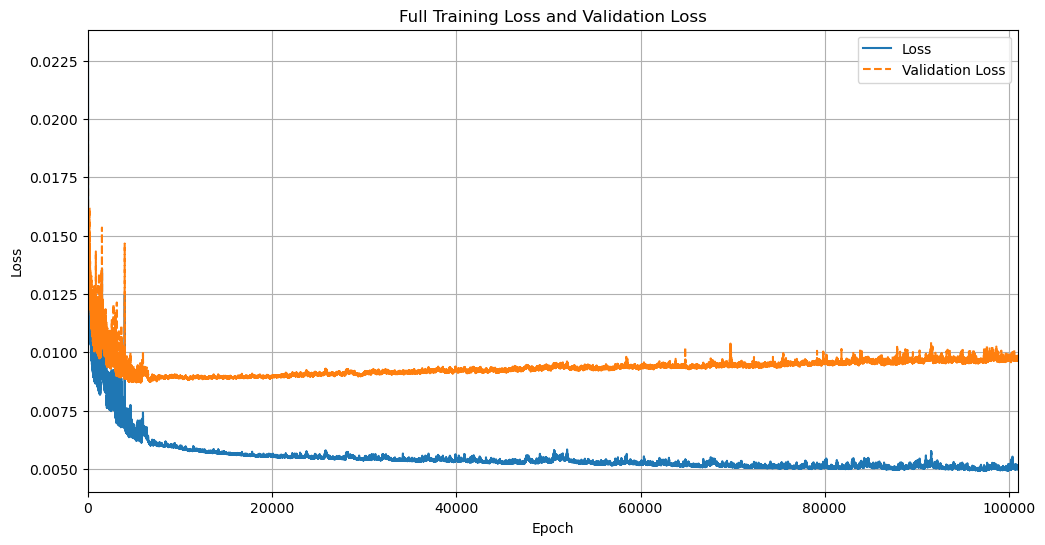

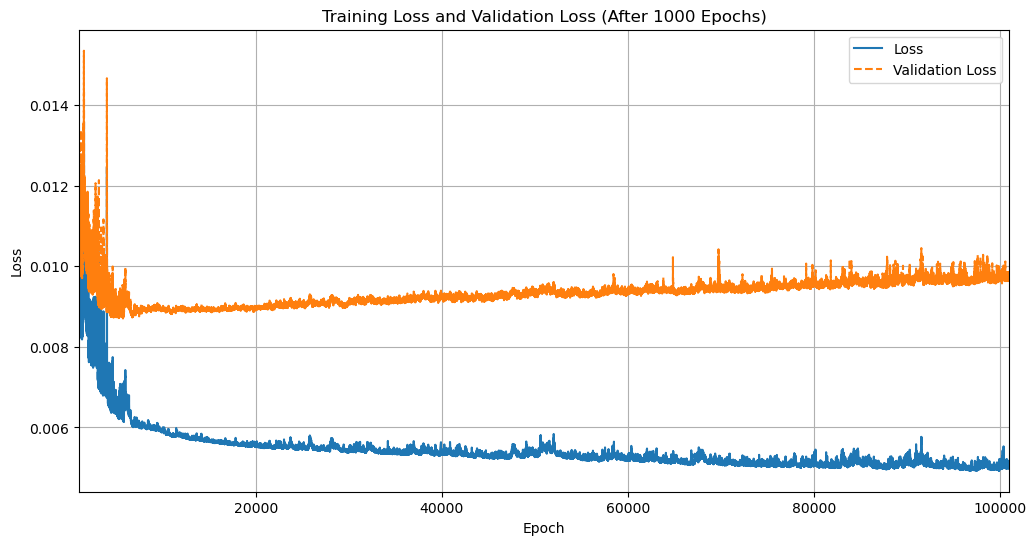

Minimum Loss: 0.004926 at Epoch 99929
Minimum Validation Loss: 0.008702 at Epoch 4447


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the folder where training loss data is stored
loss_data_folder = 'Default_AE_Default_Data_RLROP/AE_Training_1/AE_Training_Loss_Data'

# Initialize lists to store combined data
all_loss = []
all_val_loss = []

# Load all training loss data and concatenate into single lists
for counts in range(101):
    history_file_path = os.path.join(loss_data_folder, f"{counts}_Autoencoder_Training_History.pkl")
    if os.path.exists(history_file_path):
        history = pd.read_pickle(history_file_path)
        all_loss.extend(history['loss'].tolist())
        all_val_loss.extend(history['val_loss'].tolist())
    else:
        print(f"Warning: Missing file for count {counts}")

# Ensure epoch indices are properly aligned with 101,000 epochs
epochs = list(range(len(all_loss)))

# Plot 1: Full training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, all_loss, label='Loss')
plt.plot(epochs, all_val_loss, label='Validation Loss', linestyle='--')
plt.title('Full Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 101000)
plt.legend()
plt.grid()
plt.show()

# Plot 2: Training loss and validation loss omitting first 1000 epochs
plt.figure(figsize=(12, 6))
plt.plot(epochs[1000:], all_loss[1000:], label='Loss')
plt.plot(epochs[1000:], all_val_loss[1000:], label='Validation Loss', linestyle='--')
plt.title('Training Loss and Validation Loss (After 1000 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(1000, 101000)
plt.legend()
plt.grid()
plt.show()

# Find and print minimum loss and validation loss with corresponding epochs
min_loss = min(all_loss)
min_loss_epoch = all_loss.index(min_loss)

min_val_loss = min(all_val_loss)
min_val_loss_epoch = all_val_loss.index(min_val_loss)

print(f"Minimum Loss: {min_loss:.6f} at Epoch {min_loss_epoch}")
print(f"Minimum Validation Loss: {min_val_loss:.6f} at Epoch {min_val_loss_epoch}")


# Batch Size 512

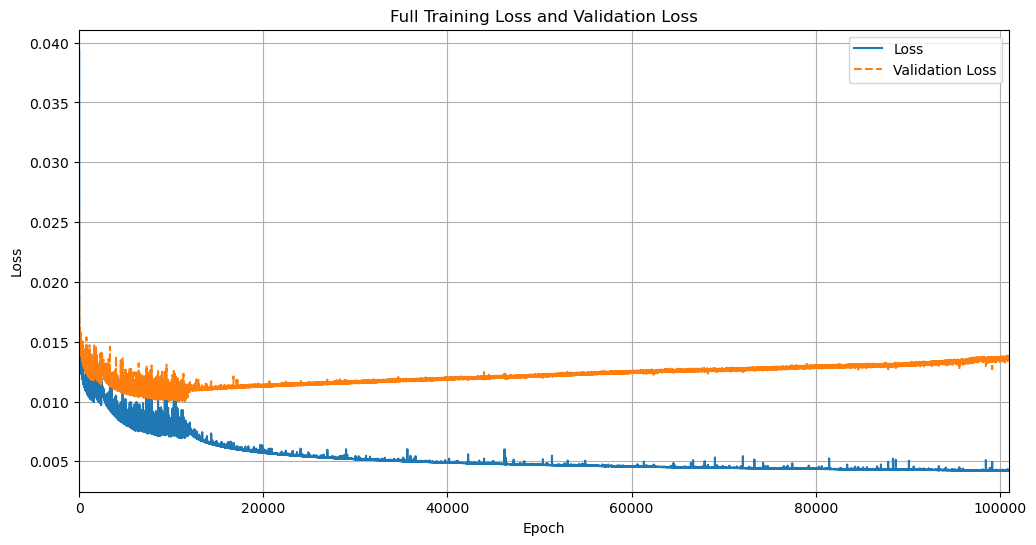

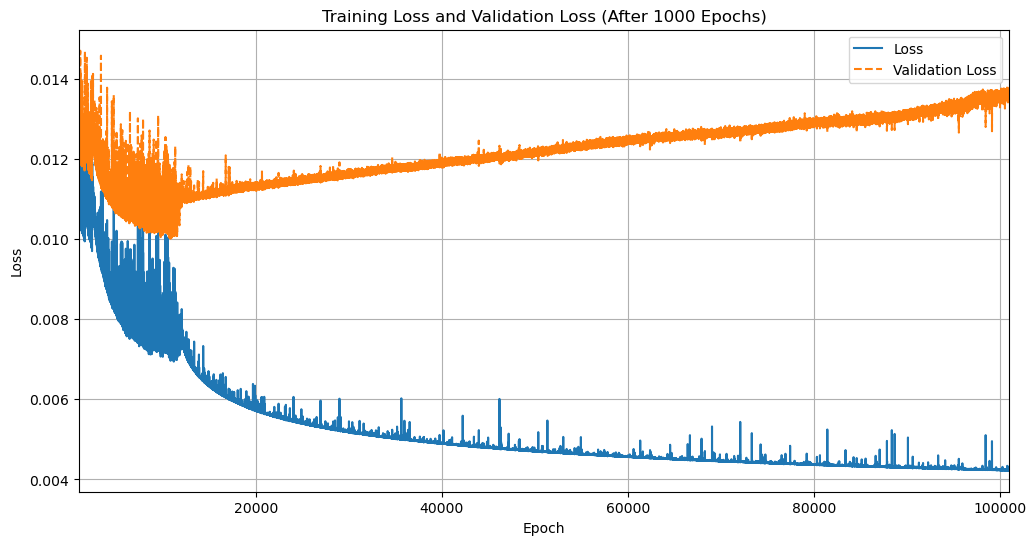

Minimum Loss: 0.004217 at Epoch 100800
Minimum Validation Loss: 0.010015 at Epoch 10823


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the folder where training loss data is stored
loss_data_folder = 'Default_AE_BS_512_Default_Data/AE_Training_1/AE_Training_Loss_Data'

# Initialize lists to store combined data
all_loss = []
all_val_loss = []

# Load all training loss data and concatenate into single lists
for counts in range(101):
    history_file_path = os.path.join(loss_data_folder, f"{counts}_Autoencoder_Training_History.pkl")
    if os.path.exists(history_file_path):
        history = pd.read_pickle(history_file_path)
        all_loss.extend(history['loss'].tolist())
        all_val_loss.extend(history['val_loss'].tolist())
    else:
        print(f"Warning: Missing file for count {counts}")

# Ensure epoch indices are properly aligned with 101,000 epochs
epochs = list(range(len(all_loss)))

# Plot 1: Full training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, all_loss, label='Loss')
plt.plot(epochs, all_val_loss, label='Validation Loss', linestyle='--')
plt.title('Full Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 101000)
plt.legend()
plt.grid()
plt.show()

# Plot 2: Training loss and validation loss omitting first 1000 epochs
plt.figure(figsize=(12, 6))
plt.plot(epochs[1000:], all_loss[1000:], label='Loss')
plt.plot(epochs[1000:], all_val_loss[1000:], label='Validation Loss', linestyle='--')
plt.title('Training Loss and Validation Loss (After 1000 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(1000, 101000)
plt.legend()
plt.grid()
plt.show()

# Find and print minimum loss and validation loss with corresponding epochs
min_loss = min(all_loss)
min_loss_epoch = all_loss.index(min_loss)

min_val_loss = min(all_val_loss)
min_val_loss_epoch = all_val_loss.index(min_val_loss)

print(f"Minimum Loss: {min_loss:.6f} at Epoch {min_loss_epoch}")
print(f"Minimum Validation Loss: {min_val_loss:.6f} at Epoch {min_val_loss_epoch}")

# XGBoost Filtered Dataset

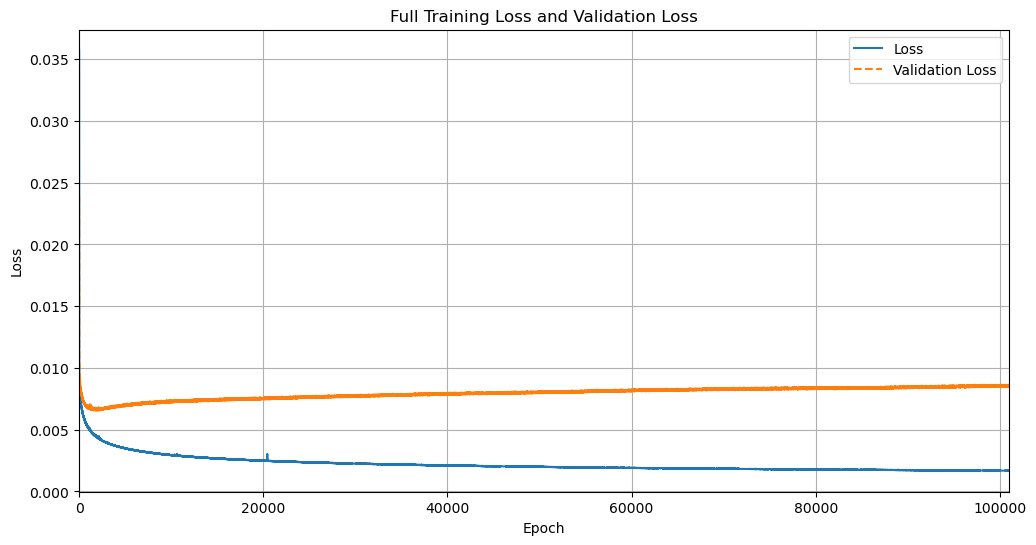

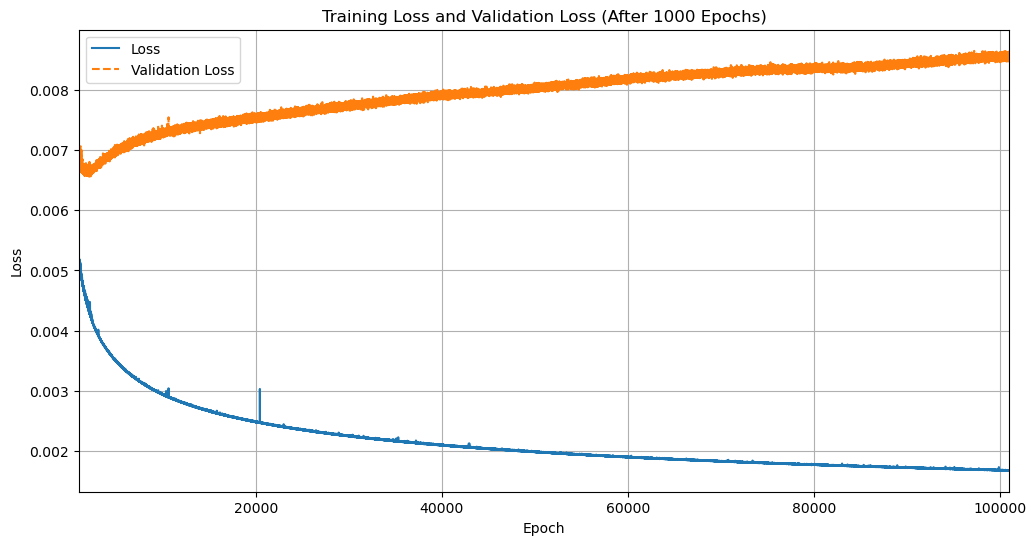

Minimum Loss: 0.001678 at Epoch 99897
Minimum Validation Loss: 0.006556 at Epoch 2069


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the folder where training loss data is stored
loss_data_folder = 'Default_AE_Filtered_Data/AE_Training_1/AE_Training_Loss_Data'

# Initialize lists to store combined data
all_loss = []
all_val_loss = []

# Load all training loss data and concatenate into single lists
for counts in range(101):
    history_file_path = os.path.join(loss_data_folder, f"{counts}_Autoencoder_Training_History.pkl")
    if os.path.exists(history_file_path):
        history = pd.read_pickle(history_file_path)
        all_loss.extend(history['loss'].tolist())
        all_val_loss.extend(history['val_loss'].tolist())
    else:
        print(f"Warning: Missing file for count {counts}")

# Ensure epoch indices are properly aligned with 101,000 epochs
epochs = list(range(len(all_loss)))

# Plot 1: Full training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, all_loss, label='Loss')
plt.plot(epochs, all_val_loss, label='Validation Loss', linestyle='--')
plt.title('Full Training Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 101000)
plt.legend()
plt.grid()
plt.show()

# Plot 2: Training loss and validation loss omitting first 1000 epochs
plt.figure(figsize=(12, 6))
plt.plot(epochs[1000:], all_loss[1000:], label='Loss')
plt.plot(epochs[1000:], all_val_loss[1000:], label='Validation Loss', linestyle='--')
plt.title('Training Loss and Validation Loss (After 1000 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(1000, 101000)
plt.legend()
plt.grid()
plt.show()

# Find and print minimum loss and validation loss with corresponding epochs
min_loss = min(all_loss)
min_loss_epoch = all_loss.index(min_loss)

min_val_loss = min(all_val_loss)
min_val_loss_epoch = all_val_loss.index(min_val_loss)

print(f"Minimum Loss: {min_loss:.6f} at Epoch {min_loss_epoch}")
print(f"Minimum Validation Loss: {min_val_loss:.6f} at Epoch {min_val_loss_epoch}")